Installing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.pyplot import figure

from matplotlib import rcParams
import seaborn as sns

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime



Styling

Loading the data

In [3]:
path = "MachineLearning-PSIFbyHighRiskExposure_PSIFIncidentsbyHRE_2023-02-02-16-59-35.csv"

In [4]:
df = pd.read_csv(path ,delimiter=',')


#Preliminary Analysis

In [5]:
df.columns

Index(['Record No.', 'System Type', 'Date', 'Location', 'High Risk Exposures'], dtype='object')

In [6]:
df.head(5)

Record No.                  System Type                   Date  \
0        1148  Near Miss / Property Damage    1/7/2020 2:15:00 PM   
1         701  Near Miss / Property Damage   1/20/2020 9:00:00 AM   
2        1145  Near Miss / Property Damage  1/21/2020 11:00:00 AM   
3        1145  Near Miss / Property Damage  1/21/2020 11:00:00 AM   
4        1150  Near Miss / Property Damage  1/24/2020 12:30:00 AM   

             Location                            High Risk Exposures  
0     OSE Rocky Mount                                           Fire  
1  CCI Transportation                         Dropped/Falling Object  
2    OSE Kernersville  Struck By/Moving Equipment (inc. Mobile/Rail)  
3    OSE Kernersville                         Dropped/Falling Object  
4     OSE Rocky Mount                                           Fire

In [7]:
df.describe()
#doesn't really give much info since all the variables contain textual data

Record No.
count  1218.000000
mean   2309.297209
std    1373.870643
min       5.000000
25%    1167.250000
50%    2244.000000
75%    3441.000000
max    4781.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Record No.           1218 non-null   int64 
 1   System Type          1218 non-null   object
 2   Date                 1218 non-null   object
 3   Location             1218 non-null   object
 4   High Risk Exposures  1218 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.7+ KB


In [9]:
df.isna()

Record No.  System Type   Date  Location  High Risk Exposures
0          False        False  False     False                False
1          False        False  False     False                False
2          False        False  False     False                False
3          False        False  False     False                False
4          False        False  False     False                False
...          ...          ...    ...       ...                  ...
1213       False        False  False     False                False
1214       False        False  False     False                False
1215       False        False  False     False                False
1216       False        False  False     False                False
1217       False        False  False     False                False

[1218 rows x 5 columns]

In [10]:
df.isna().sum()


Record No.             0
System Type            0
Date                   0
Location               0
High Risk Exposures    0
dtype: int64

In [11]:
df.nunique()

Record No.             1026
System Type               2
Date                   1015
Location                116
High Risk Exposures      12
dtype: int64

In [12]:
df.duplicated().sum()

0

#Univariate analysis

In [13]:
df["System Type"].value_counts()


Near Miss / Property Damage    960
Injury/Illness                 258
Name: System Type, dtype: int64

In [14]:
df["System Type"].value_counts(normalize = True)

Near Miss / Property Damage    0.788177
Injury/Illness                 0.211823
Name: System Type, dtype: float64

In [15]:
df["Location"].value_counts()

NM Mexico                47
CCI Transportation       44
Butler Melting           41
Vulcan                   37
NM Fallon                34
                         ..
NOD Ecorse                1
SMD Division Services     1
MD Coldwater              1
SID Heartland             1
Colombia                  1
Name: Location, Length: 116, dtype: int64

In [16]:
df["Location"].value_counts().head(10)

NM Mexico                   47
CCI Transportation          44
Butler Melting              41
Vulcan                      37
NM Fallon                   34
Heartland - Production      31
Superior Aluminum Alloys    30
RB Melt/Cast                29
Butler Hot Mill             29
PIT Rolling Mill            28
Name: Location, dtype: int64

In [17]:
df["Location"].value_counts().tail(20)

Kentucky Electric           2
MOD Defiance                2
FR Sinton                   2
CCI Quality                 2
Nuevo Leon                  2
SWVA #1 Finish              1
Heartland - Admin           1
RB Transportation           1
Saltillo                    1
OSE Fayetteville            1
OSE Trucking - Tennessee    1
MD Bay City                 1
MOD Trucking - Lima         1
OSE Trucking - East NC      1
SID ASR                     1
NOD Ecorse                  1
SMD Division Services       1
MD Coldwater                1
SID Heartland               1
Colombia                    1
Name: Location, dtype: int64

In [18]:
df["Location"].value_counts(normalize = True).head(10)

NM Mexico                   0.038588
CCI Transportation          0.036125
Butler Melting              0.033662
Vulcan                      0.030378
NM Fallon                   0.027915
Heartland - Production      0.025452
Superior Aluminum Alloys    0.024631
RB Melt/Cast                0.023810
Butler Hot Mill             0.023810
PIT Rolling Mill            0.022989
Name: Location, dtype: float64

In [19]:
df["High Risk Exposures"].value_counts()

Struck By/Moving Equipment (inc. Mobile/Rail)    259
Dropped/Falling Object                           244
Lifting/Rigging (inc. Cranes)                    165
Hazardous Energy (inc. LOTOTO)                   113
Caught In/Between (inc. Machine Guarding)        104
Fall Exposure (inc. Fall Protection)              69
Explosion/Projectiles                             66
Fire                                              65
Other High Risk Exposure                          58
Hot Metal                                         52
Atmospheric Hazards (inc. Confined Space)         13
Power Tools                                       10
Name: High Risk Exposures, dtype: int64

In [20]:
df["High Risk Exposures"].value_counts(normalize = True)

Struck By/Moving Equipment (inc. Mobile/Rail)    0.212644
Dropped/Falling Object                           0.200328
Lifting/Rigging (inc. Cranes)                    0.135468
Hazardous Energy (inc. LOTOTO)                   0.092775
Caught In/Between (inc. Machine Guarding)        0.085386
Fall Exposure (inc. Fall Protection)             0.056650
Explosion/Projectiles                            0.054187
Fire                                             0.053366
Other High Risk Exposure                         0.047619
Hot Metal                                        0.042693
Atmospheric Hazards (inc. Confined Space)        0.010673
Power Tools                                      0.008210
Name: High Risk Exposures, dtype: float64

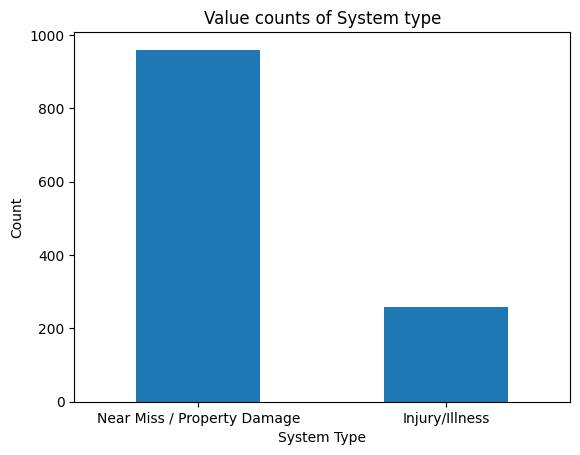

In [21]:
df["System Type"].value_counts().plot(kind="bar")
plt.title("Value counts of System type")
plt.xlabel("System Type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

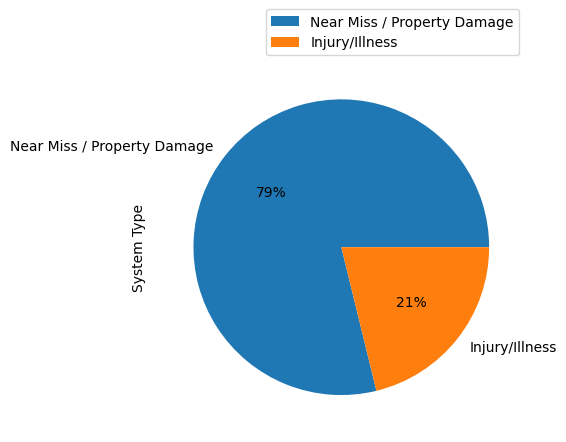

In [22]:
df["System Type"].value_counts().plot(kind='pie', y='System type', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1,1), loc="lower right")
plt.show()

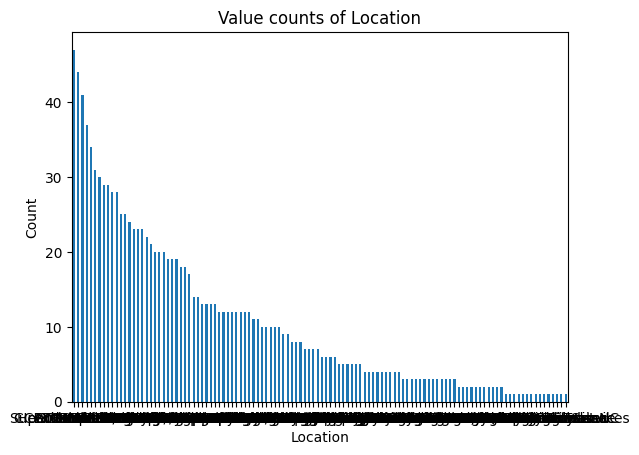

In [23]:
df["Location"].value_counts().plot(kind="bar")
plt.title("Value counts of Location")
plt.xlabel("Location")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

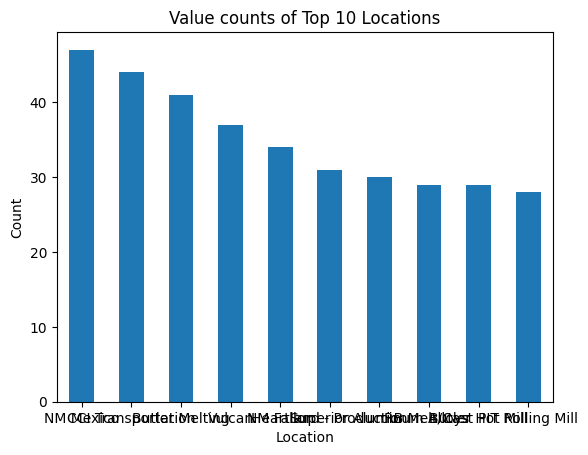

In [24]:
df["Location"].value_counts().head(10).plot(kind="bar")
plt.title("Value counts of Top 10 Locations")
plt.xlabel("Location")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

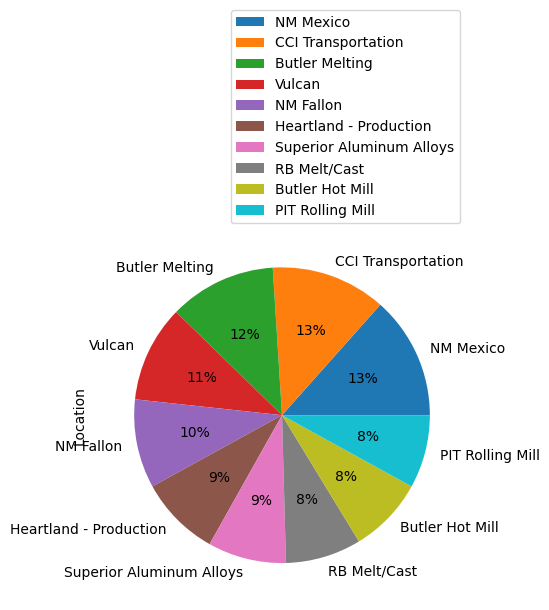

In [25]:
df["Location"].value_counts(normalize = True).head(10).plot(kind='pie', y='Top 10 Locations', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1,1), loc="lower right")
plt.show()

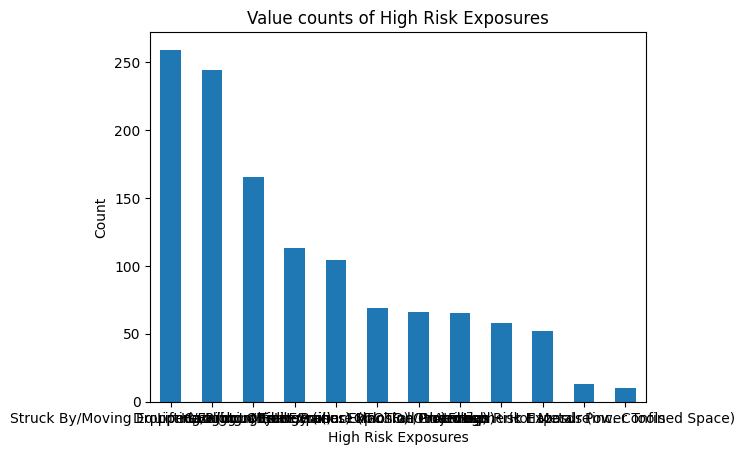

In [26]:
df["High Risk Exposures"].value_counts().plot(kind="bar")
plt.title("Value counts of High Risk Exposures")
plt.xlabel("High Risk Exposures")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show() 

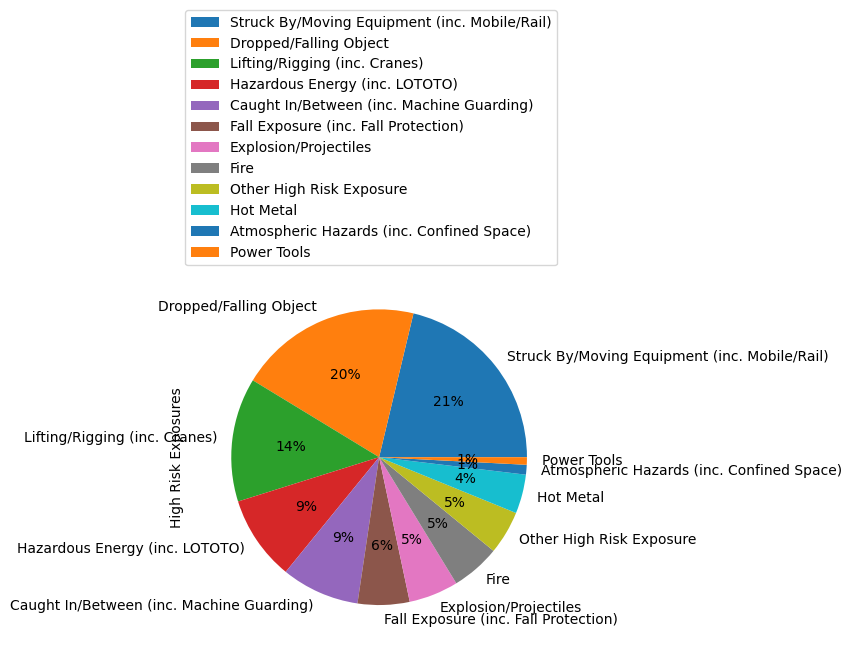

In [27]:
df["High Risk Exposures"].value_counts().plot(kind='pie', y='High Risk Exposures', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1,1), loc="lower right")
plt.show()

Extracting only date from df and adding it to a new dataframe to analyze the incidents over the years

In [28]:
data = pd.DataFrame()
# data["Date"] = pd.to_datetime(df["Date"])

# data.info()
# data.head(5)

data['date'] = pd.to_datetime(df['Date']).dt.date
data.head(5)



date
0  2020-01-07
1  2020-01-20
2  2020-01-21
3  2020-01-21
4  2020-01-24

In [29]:
data.nunique()


date    624
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1218 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


In [31]:
data['date'].value_counts()

2021-03-12    9
2022-03-14    8
2022-08-30    8
2021-11-15    7
2022-02-10    6
             ..
2021-06-03    1
2021-06-02    1
2021-05-31    1
2021-05-27    1
2021-09-10    1
Name: date, Length: 624, dtype: int64

<AxesSubplot: xlabel='date'>

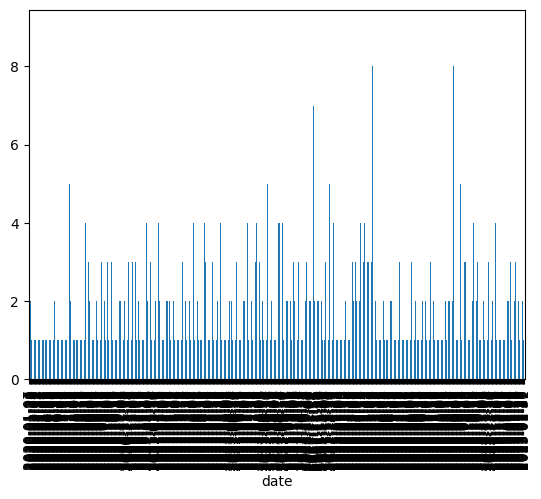

In [32]:
data.groupby('date').size().plot(kind = 'bar')

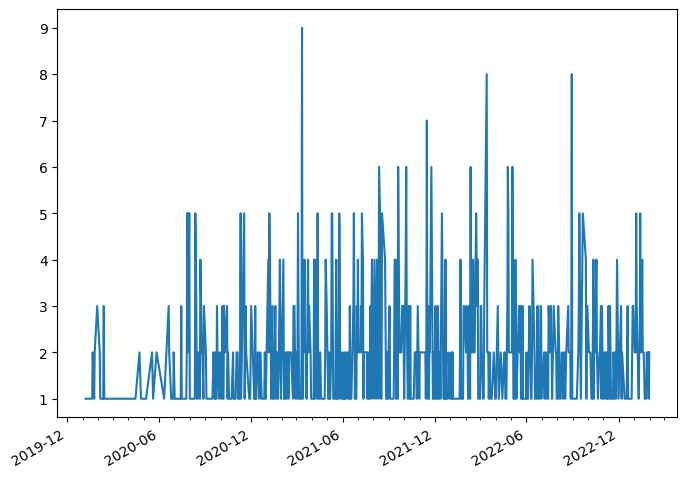

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data["date"].unique(), data["date"].value_counts(sort=False))
fig.autofmt_xdate()


#Bivariate Analysis

In [34]:
new_df = df.drop('Record No.', axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   System Type          1218 non-null   object
 1   Date                 1218 non-null   object
 2   Location             1218 non-null   object
 3   High Risk Exposures  1218 non-null   object
dtypes: object(4)
memory usage: 38.2+ KB


In [35]:
# data['date'] = pd.to_datetime(df['Date']).dt.date


Correlation between all the variables

#Creating a new dataframe to convert all the string/textual data into categorical data (0,1,2 etc) to get the correlation between columns

In [43]:
new_df['System Type']= new_df['System Type'].astype('category').cat.codes
new_df['Date']= new_df['Date'].astype('category').cat.codes
new_df['Location']= new_df['Location'].astype('category').cat.codes
new_df['High Risk Exposures']= new_df['High Risk Exposures'].astype('category').cat.codes
new_df.corr()


System Type      Date  Location  High Risk Exposures
System Type             1.000000 -0.112207 -0.087847             0.111799
Date                   -0.112207  1.000000  0.013394            -0.008058
Location               -0.087847  0.013394  1.000000            -0.045279
High Risk Exposures     0.111799 -0.008058 -0.045279             1.000000

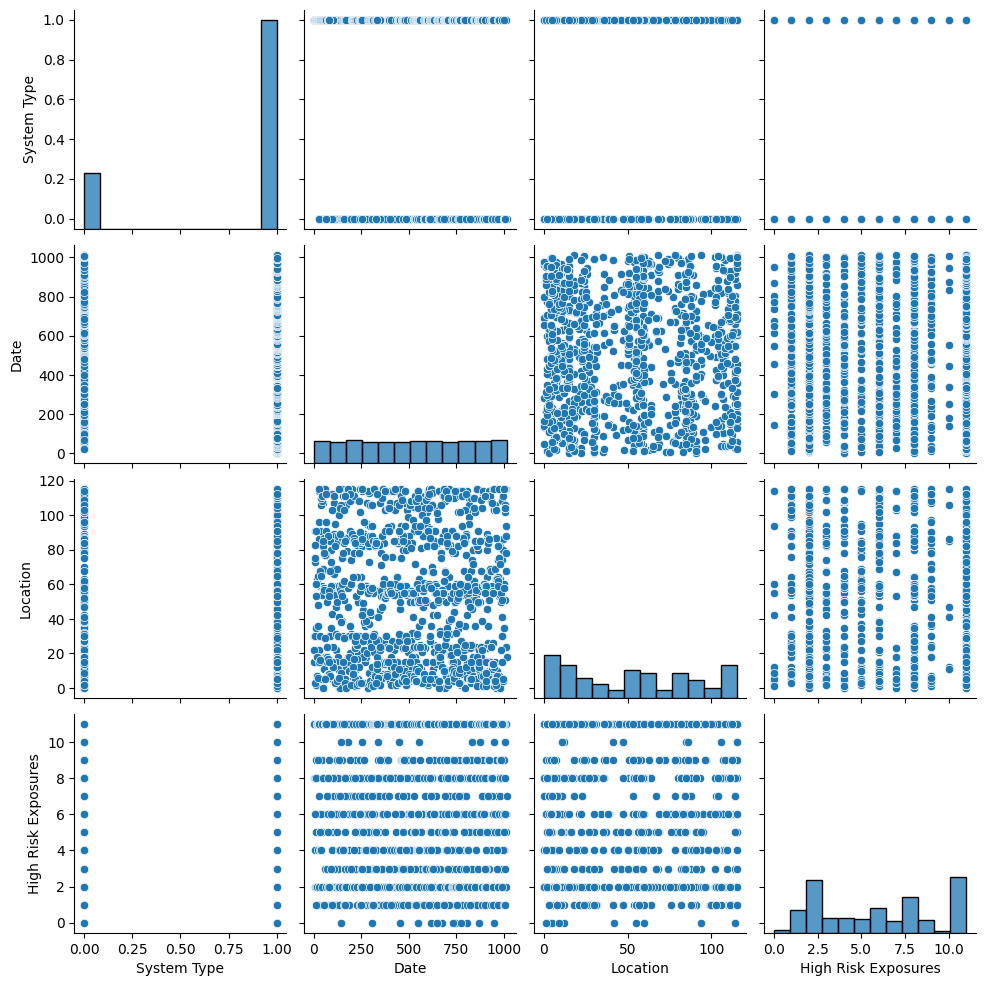

In [37]:
sns.pairplot(new_df)

array([[<AxesSubplot: title={'center': 'System Type'}>,
        <AxesSubplot: title={'center': 'Date'}>],
       [<AxesSubplot: title={'center': 'Location'}>,
        <AxesSubplot: title={'center': 'High Risk Exposures'}>]],
      dtype=object)

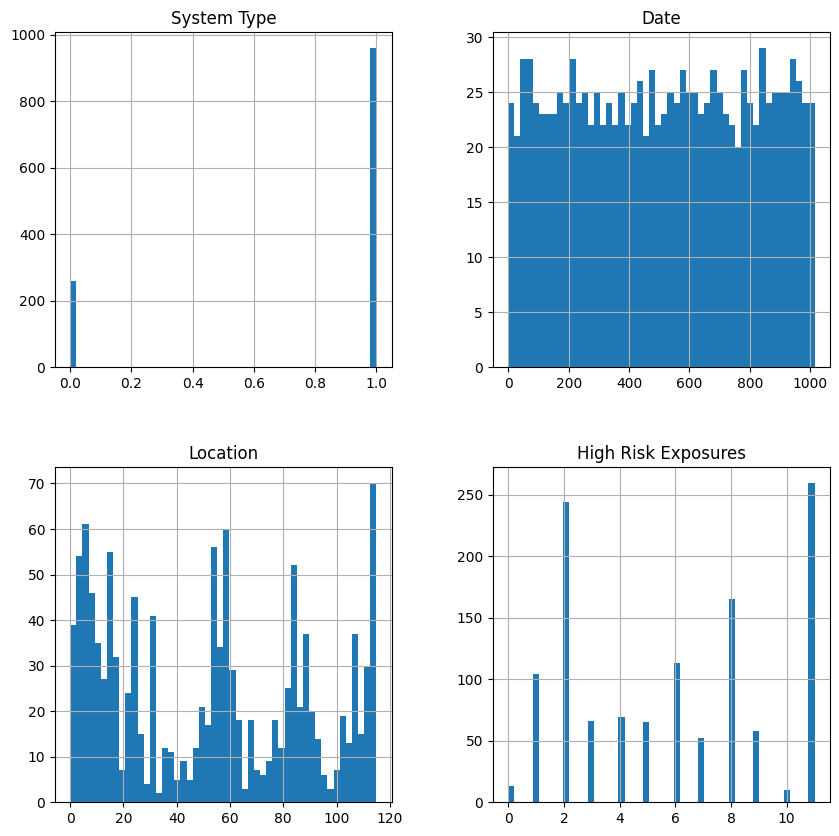

In [40]:
new_df.hist(figsize=(10, 10), bins=50, xlabelsize=10, ylabelsize=10)

In [56]:
new_df.rename(columns={'System Type': 'System_Type', 'High Risk Exposure': 'High_Risk_Exposure'}, inplace=True)


In [57]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   System_Type          1218 non-null   int8 
 1   Date                 1218 non-null   int16
 2   Location             1218 non-null   int8 
 3   High Risk Exposures  1218 non-null   int8 
dtypes: int16(1), int8(3)
memory usage: 6.1 KB


In [65]:
#Bivariate analysis of Location wrt other columns 

In [58]:
pd.crosstab([df["Location"]],df["High Risk Exposures"], rownames = ["Locations"],colnames = ["High Risk Exposures"])

High Risk Exposures       Atmospheric Hazards (inc. Confined Space)  \
Locations                                                             
Butler Casting                                                    0   
Butler Engineering                                                1   
Butler Finishing                                                  0   
Butler Hot Mill                                                   1   
Butler Iron Dynamics                                              1   
...                                                             ...   
Sinton - Melting                                                  0   
Sinton - Transportation                                           0   
Steel Ventures, Inc.                                              0   
Superior Aluminum Alloys                                          2   
Vulcan                                                            0   

High Risk Exposures       Caught In/Between (inc. Machine Guarding)  \
Locations                                                             
Butler Casting                                                    0   
Butler Engineering                                                0   
Butler Finishing                                                  0   
Butler Hot Mill                                                   2   
Butler Iron Dynamics                                              2   
...                                                             ...   
Sinton - Melting                                                  4   
Sinton - Transportation                                           0   
Steel Ventures, Inc.                                              1   
Superior Aluminum Alloys                                          0   
Vulcan                                                            7   

High Risk Exposures       Dropped/Falling Object  Explosion/Projectiles  \
Locations                                                                 
Butler Casting                                 4                      0   
Butler Engineering                             0                      0   
Butler Finishing                               5                      1   
Butler Hot Mill                                3                      0   
Butler Iron Dynamics                           5                      3   
...                                          ...                    ...   
Sinton - Melting                               8                      0   
Sinton - Transportation                        0                      0   
Steel Ventures, Inc.                           1                      0   
Superior Aluminum Alloys                       4                      4   
Vulcan                                         6                      2   

High Risk Exposures       Fall Exposure (inc. Fall Protection)  Fire  \
Locations                                                              
Butler Casting                                               2     0   
Butler Engineering                                           2     0   
Butler Finishing                                             0     1   
Butler Hot Mill                                              0     6   
Butler Iron Dynamics                                         1     2   
...                                                        ...   ...   
Sinton - Melting                                             0     0   
Sinton - Transportation                                      0     0   
Steel Ventures, Inc.                                         0     0   
Superior Aluminum Alloys                                     0     2   
Vulcan                                                       2     1   

High Risk Exposures       Hazardous Energy (inc. LOTOTO)  Hot Metal  \
Locations                                                             
Butler Casting                                         0          1   
Butler Engineering        

In [59]:
pd.crosstab([df["Location"]],df["System Type"], rownames = ["Locations"],colnames = ["System Type"])

System Type               Injury/Illness  Near Miss / Property Damage
Locations                                                            
Butler Casting                         2                           10
Butler Engineering                     1                            6
Butler Finishing                       5                           15
Butler Hot Mill                        4                           25
Butler Iron Dynamics                   9                           16
...                                  ...                          ...
Sinton - Melting                       3                           21
Sinton - Transportation                2                            4
Steel Ventures, Inc.                   3                            0
Superior Aluminum Alloys              11                           19
Vulcan                                12                           25

[116 rows x 2 columns]

#Date vs other columns 

In [60]:
pd.crosstab([df["Date"]],df["System Type"], rownames = ["Dates"],colnames = ["System Type"])

System Type            Injury/Illness  Near Miss / Property Damage
Dates                                                             
1/1/2022 5:00:00 AM                 0                            1
1/10/2021 12:30:00 PM               0                            1
1/10/2023 9:00:00 PM                0                            1
1/11/2022 5:00:00 PM                0                            1
1/11/2023 1:30:00 PM                0                            1
...                               ...                          ...
9/6/2021 4:00:00 AM                 0                            1
9/6/2022 1:00:00 PM                 0                            1
9/8/2020 2:30:00 PM                 0                            1
9/8/2021 5:15:00 PM                 0                            1
9/9/2022 10:30:00 AM                1                            0

[1015 rows x 2 columns]

In [62]:
pd.crosstab([df["Date"]],df["Location"], rownames = ["Date"],colnames = ["Locations"])

Locations              Butler Casting  Butler Engineering  Butler Finishing  \
Date                                                                          
1/1/2022 5:00:00 AM                 0                   0                 0   
1/10/2021 12:30:00 PM               0                   0                 0   
1/10/2023 9:00:00 PM                0                   0                 0   
1/11/2022 5:00:00 PM                0                   0                 0   
1/11/2023 1:30:00 PM                0                   0                 0   
...                               ...                 ...               ...   
9/6/2021 4:00:00 AM                 0                   0                 0   
9/6/2022 1:00:00 PM                 0                   0                 0   
9/8/2020 2:30:00 PM                 0                   0                 0   
9/8/2021 5:15:00 PM                 0                   0                 0   
9/9/2022 10:30:00 AM                0                   0                 0   

Locations              Butler Hot Mill  Butler Iron Dynamics  Butler Melting  \
Date                                                                           
1/1/2022 5:00:00 AM                  0                     0               0   
1/10/2021 12:30:00 PM                0                     0               0   
1/10/2023 9:00:00 PM                 0                     0               0   
1/11/2022 5:00:00 PM                 1                     0               0   
1/11/2023 1:30:00 PM                 0                     0               0   
...                                ...                   ...             ...   
9/6/2021 4:00:00 AM                  0                     0               0   
9/6/2022 1:00:00 PM                  0                     0               0   
9/8/2020 2:30:00 PM                  0                     0               0   
9/8/2021 5:15:00 PM                  0                     0               0   
9/9/2022 10:30:00 AM                 0                     0               0   

Locations              Butler Pickle/Cold Rolling  Butler Transportation  \
Date                                                                       
1/1/2022 5:00:00 AM                             0                      0   
1/10/2021 12:30:00 PM                           0                      0   
1/10/2023 9:00:00 PM                            0                      0   
1/11/2022 5:00:00 PM                            0                      0   
1/11/2023 1:30:00 PM                            0                      0   
...                                           ...                    ...   
9/6/2021 4:00:00 AM                             0                      0   
9/6/2022 1:00:00 PM                             0                      0   
9/8/2020 2:30:00 PM                             0                      0   
9/8/2021 5:15:00 PM                             0                      0   
9/9/2022 10:30:00 AM                            0                      0   

Locations              CCI Casting  CCI Engineering  ...  \
Date                                                 ...   
1/1/2022 5:00:00 AM              0                0  ...   
1/10/2021 12:30:00 PM            0                0  ...   
1/10/2023 9:00:00 PM             0                0  ...   
1/11/2022 5:00:00 PM             0                0  ...   
1/11/2023 1:30:00 PM             0                0  ...   
...                            ...              ...  ...   
9/6/2021 4:00:00 AM              0                0  ...   
9/6/2022 1:00:00 PM              0                0  ...   
9/8/2020 2:30:00 PM              0                0  ...   
9/8/2021 5:15:00 PM              0                0  ...   
9/9/2022 10:30:00 AM             0                0  ...   

Locations              Sinton - CM - Finish  Sinton - CM - Roll  \
Date                                                              
1/1/2022 5:00:00 AM        

In [64]:
pd.crosstab([df["Date"]],df["High Risk Exposures"], rownames = ["Date"],colnames = ["High Risk Exposure"])

High Risk Exposure     Atmospheric Hazards (inc. Confined Space)  \
Date                                                               
1/1/2022 5:00:00 AM                                            0   
1/10/2021 12:30:00 PM                                          0   
1/10/2023 9:00:00 PM                                           0   
1/11/2022 5:00:00 PM                                           0   
1/11/2023 1:30:00 PM                                           0   
...                                                          ...   
9/6/2021 4:00:00 AM                                            0   
9/6/2022 1:00:00 PM                                            0   
9/8/2020 2:30:00 PM                                            0   
9/8/2021 5:15:00 PM                                            0   
9/9/2022 10:30:00 AM                                           0   

High Risk Exposure     Caught In/Between (inc. Machine Guarding)  \
Date                                                               
1/1/2022 5:00:00 AM                                            0   
1/10/2021 12:30:00 PM                                          0   
1/10/2023 9:00:00 PM                                           0   
1/11/2022 5:00:00 PM                                           0   
1/11/2023 1:30:00 PM                                           0   
...                                                          ...   
9/6/2021 4:00:00 AM                                            0   
9/6/2022 1:00:00 PM                                            0   
9/8/2020 2:30:00 PM                                            0   
9/8/2021 5:15:00 PM                                            0   
9/9/2022 10:30:00 AM                                           0   

High Risk Exposure     Dropped/Falling Object  Explosion/Projectiles  \
Date                                                                   
1/1/2022 5:00:00 AM                         0                      0   
1/10/2021 12:30:00 PM                       0                      0   
1/10/2023 9:00:00 PM                        0                      0   
1/11/2022 5:00:00 PM                        0                      0   
1/11/2023 1:30:00 PM                        0                      0   
...                                       ...                    ...   
9/6/2021 4:00:00 AM                         0                      0   
9/6/2022 1:00:00 PM                         1                      0   
9/8/2020 2:30:00 PM                         0                      0   
9/8/2021 5:15:00 PM                         0                      0   
9/9/2022 10:30:00 AM                        0                      0   

High Risk Exposure     Fall Exposure (inc. Fall Protection)  Fire  \
Date                                                                
1/1/2022 5:00:00 AM                                       0     0   
1/10/2021 12:30:00 PM                                     0     0   
1/10/2023 9:00:00 PM                                      0     0   
1/11/2022 5:00:00 PM                                      0     0   
1/11/2023 1:30:00 PM                                      1     0   
...                                                     ...   ...   
9/6/2021 4:00:00 AM                                       0     1   
9/6/2022 1:00:00 PM                                       0     0   
9/8/2020 2:30:00 PM                                       0     0   
9/8/2021 5:15:00 PM                                       0     0   
9/9/2022 10:30:00 AM                                      0     0   

High Risk Exposure     Hazardous Energy (inc. LOTOTO)  Hot Metal  \
Date                                                               
1/1/2022 5:00:00 AM                                 0          0   
1/10/2021 12:30:00 PM                               0          0   
1/10/2023 9:00:00 PM                                0          0   
1/11/2022 5:00:00 PM                                0  

In [68]:
pd.crosstab(df["High Risk Exposures"],df["System Type"], rownames = ["High Risk Exposure"],colnames = ["System type"])

System type                                    Injury/Illness  \
High Risk Exposure                                              
Atmospheric Hazards (inc. Confined Space)                   7   
Caught In/Between (inc. Machine Guarding)                  49   
Dropped/Falling Object                                     40   
Explosion/Projectiles                                      10   
Fall Exposure (inc. Fall Protection)                       24   
Fire                                                        9   
Hazardous Energy (inc. LOTOTO)                             26   
Hot Metal                                                  13   
Lifting/Rigging (inc. Cranes)                              19   
Other High Risk Exposure                                   16   
Power Tools                                                 8   
Struck By/Moving Equipment (inc. Mobile/Rail)              37   

System type                                    Near Miss / Property Damage  
High Risk Exposure                                                          
Atmospheric Hazards (inc. Confined Space)                                6  
Caught In/Between (inc. Machine Guarding)                               55  
Dropped/Falling Object                                                 204  
Explosion/Projectiles                                                   56  
Fall Exposure (inc. Fall Protection)                                    45  
Fire                                                                    56  
Hazardous Energy (inc. LOTOTO)                                          87  
Hot Metal                                                               39  
Lifting/Rigging (inc. Cranes)                                          146  
Other High Risk Exposure                                                42  
Power Tools                                                              2  
Struck By/Moving Equipment (inc. Mobile/Rail)                          222